# `filterbanks`

The `filterbanks` module contains some pre-defined filter banks that can be useful for specific tasks. Almost all of them `FilterBank` objects as presented in the general notebook.

In [3]:
import dsptoolbox as dsp
from os.path import join

fs_hz = 48000

## Filterbanks
Here, the creation of the different filterbanks is demonstrated.

In [4]:
gammatone = dsp.filterbanks.auditory_filters_gammatone(
    frequency_range_hz=[1000, 4000],
    resolution=1,
    sampling_rate_hz=fs_hz)

octave = dsp.filterbanks.fractional_octave_bands(
    frequency_range_hz=[63, 500],
    octave_fraction=3,
    filter_order=10,
    sampling_rate_hz=fs_hz)

reconstructing = dsp.filterbanks.reconstructing_fractional_octave_bands(
    frequency_range_hz=[63, 1000], octave_fraction=1, overlap=1, slope=0,
    n_samples=2**11, sampling_rate_hz=fs_hz)

lr = dsp.filterbanks.linkwitz_riley_crossovers(
    crossover_frequencies_hz=[1000, 2000], order=8, sampling_rate_hz=fs_hz)

lowpass = dsp.Filter('fir',
                     filter_configuration=dict(filter_design_method='hamming',
                                               freqs=fs_hz//4,
                                               type_of_pass='lowpass',
                                               order=152),
                     sampling_rate_hz=fs_hz)
qmf = dsp.filterbanks.qmf_crossover(lowpass)

### Filters' responses
Besides the magnitude responses, also phases, group delays and zero-poles diagramms can be plotted.

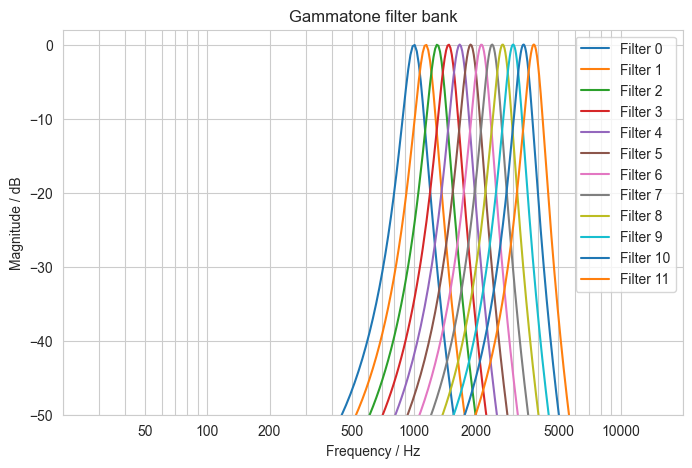

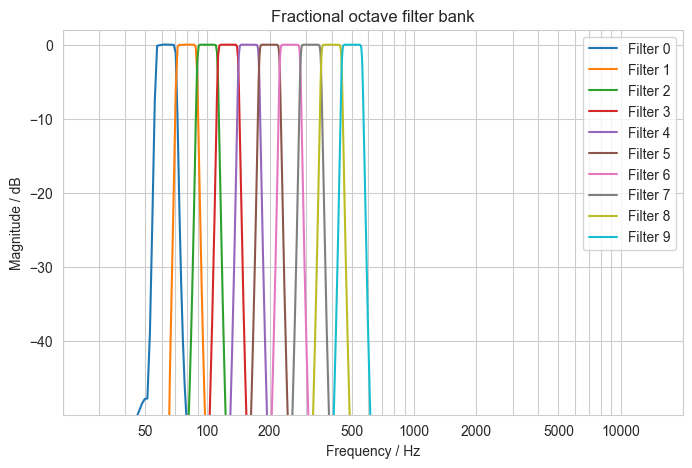

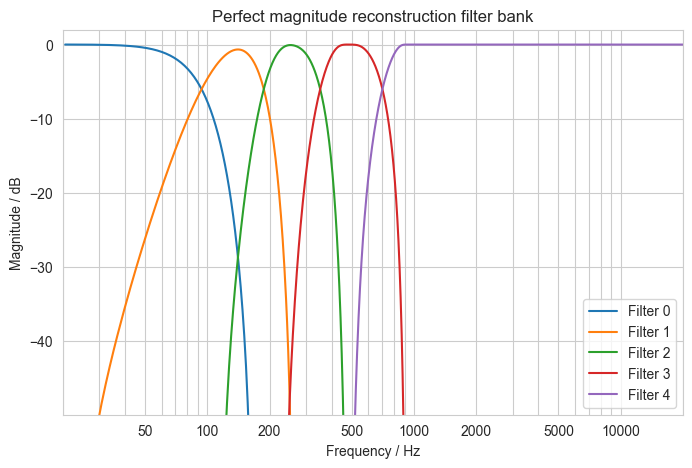

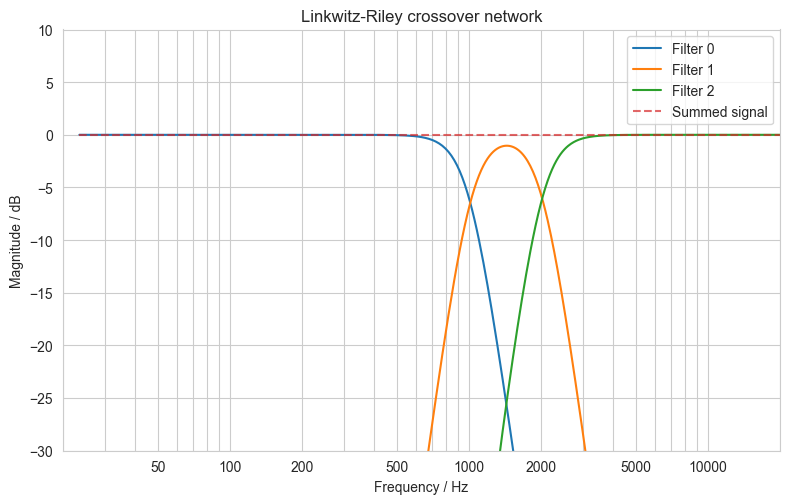

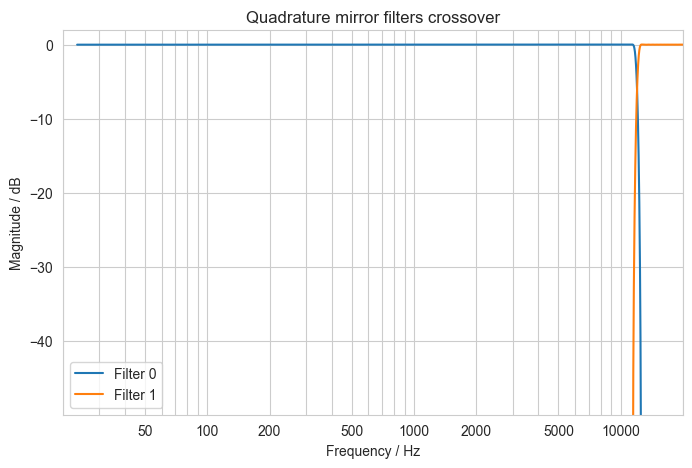

In [9]:
fig, ax = gammatone.plot_magnitude();
ax.set_title('Gammatone filter bank')
fig, ax = octave.plot_magnitude(length_samples=2**15);
ax.set_title('Fractional octave filter bank')
fig, ax = reconstructing.plot_magnitude(length_samples=2**15);
ax.set_title('Perfect magnitude reconstruction filter bank')
fig, ax = lr.plot_magnitude();
ax.set_title('Linkwitz-Riley crossover network');
fig, ax = qmf.plot_magnitude(downsample=False)
ax.set_title('Quadrature mirror filters crossover');

# Example with a signal

In [6]:
# Get signal
speech = dsp.Signal(join('data', 'speech.flac'))

In [7]:
# Filtering with gammatone filter bank – this is the same for all filter banks
multi_speech = gammatone.filter_signal(speech, zero_phase=True)
print('Number of filters in filterbank: ', gammatone.number_of_filters)
print('Number of bands in signal: ', multi_speech.number_of_bands)

Number of filters in filterbank:  12
Number of bands in signal:  12


/Users/neumanndev/opt/anaconda3/envs/dsp-dev12/lib/python3.12/site-packages/dsptoolbox/classes/signal_class.py:201: UserWarning: Signal was over 0 dBFS, normalizing to 0 dBFS peak level was triggered
  warn(


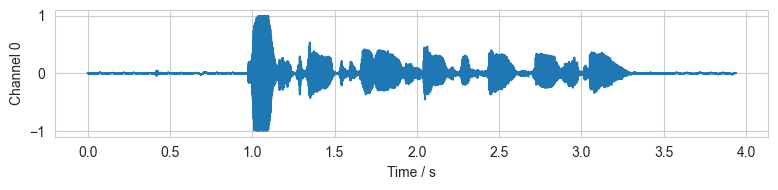

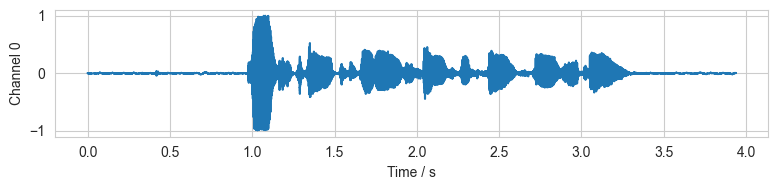

In [8]:
# Using the QMF Crossover

# Downsample decimates the signal such that an aliased downsampled version is
# obtained
speech_down = qmf.filter_signal(speech, downsample=True)
speech_down.sampling_rate_hz

# It can be reconstructed with the synthesis filters saved in the QMF crossover
reconstructed = qmf.reconstruct_signal(speech_down, upsample=True)

# Plot
speech.plot_time()
reconstructed.plot_time();